In [114]:
from functools import partial
from itertools import count
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [84]:
def array_plot(arr, size, xoff=0, yoff=0, alpha=1, color=None, text=True, **kwargs):    
    # get coordinates
    ys, xs = np.indices(arr.shape)
    idxs = [tuple(idx) for idx in np.column_stack([ys.ravel(), xs.ravel()])]
    xs = xoff + xs
    ys = yoff + ys
    xys = np.column_stack([xs.ravel(), ys.ravel()])
  
    for xy, idx in zip(xys, idxs):
        if arr[idx] is np.True_:
            rect = plt.Rectangle(xy - 0.5, 1, 1, color=color, alpha=alpha, **kwargs)
        else:
            rect = plt.Rectangle(xy - 0.5, 1, 1, color=color, **kwargs)
        plt.gca().add_patch(rect)
        
        lw = 3 * size / 10
        border = plt.Rectangle(xy - 0.5, 1, 1, linewidth=lw, facecolor='none', edgecolor='k', **kwargs)
        plt.gca().add_patch(border)
    
    # display array values
    if text:
        for (x, y), idx, val in zip(xys, idxs, arr.ravel()):
            s = str(val)
            if arr.dtype == np.bool_:
                s = s[0]
                
            x = x - 0.1 * len(s) - 0.01
            y = y + 0.15                
            plt.text(x, y, s=s, fontsize=size * 1.5, fontweight=100, alpha=alpha)

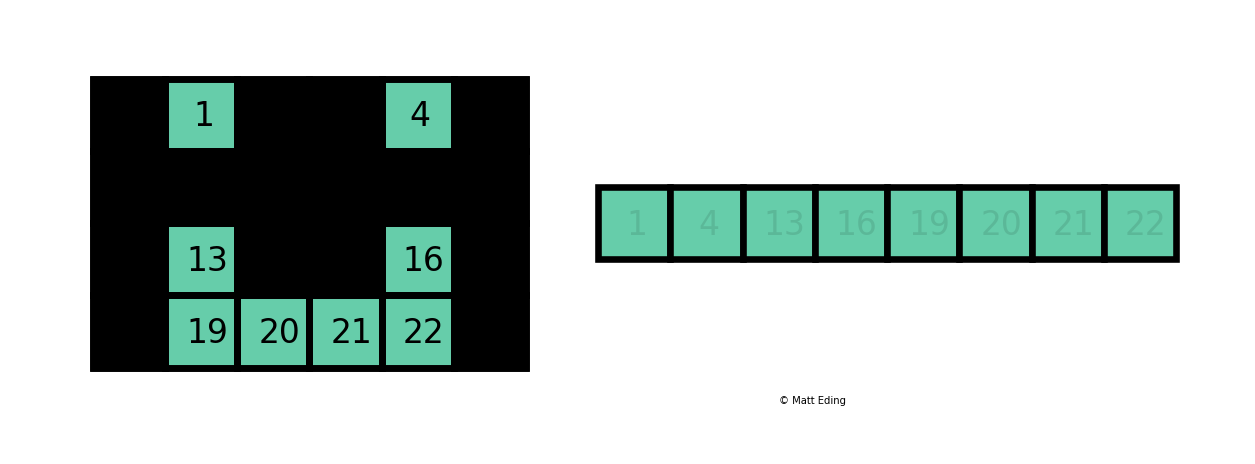

In [137]:
color = 'mediumaquamarine'
figsize = 22
max_width = 13
max_height = 4

def plot_ndim(arr, color, xo, yo, alpha=1):
    dim_plt = partial(arr_plt, color=color, alpha=alpha)
    dim_plt(arr, xoff=xo, yoff=yo)


### RANGE 2D-GRID
height, width = 4, 6
rng = np.arange(height * width).reshape(height, width)

mask = np.array([[0, 1, 0, 0, 1, 0],
                 [0, 0, 0, 0, 0, 0],
                 [0, 1, 0, 0, 1, 0],
                 [0, 1, 1, 1, 1, 0]]).astype(bool)

steps = 20
shader = np.linspace(0.9, 0, steps)
mover = np.linspace(8, 1, steps)

    
def darken_mask(shade, idx):   
    plt.figure(figsize=(figsize, figsize))
    arr_plt = partial(array_plot, size=figsize)

    canvas = np.zeros((max_height + 2, max_width + 2))
    plt.imshow(canvas, alpha=0, aspect='equal')
    plt.axis('off')

    plt.text(10, 5, '© Matt Eding')
    plot_ndim(rng, color, 1, 1)
    plot_ndim(mask, str(shade), max(mover), 1, alpha=shade)
    plt.savefig(f'mask_{idx:>3}.png', bbox_inches='tight')
    
def move_mask(move, idx):
    plt.figure(figsize=(figsize, figsize))
    arr_plt = partial(array_plot, size=figsize)

    canvas = np.zeros((max_height + 2, max_width + 2))
    plt.imshow(canvas, alpha=0, aspect='equal')
    plt.axis('off')

    plt.text(10, 5, '© Matt Eding')
    plot_ndim(rng, color, 1, 1)
    plot_ndim(mask, '0', move, 1, alpha=0)
    plt.savefig(f'mask_{idx:>3}.png', bbox_inches='tight')
    

idx_counter = count()
# for shade in shader:
#     darken_mask(shade, next(idx_counter))

# for move in mover:
#     move_mask(move, next(idx_counter))

In [128]:
cwd = Path.cwd()
paths = sorted(p for p in cwd.iterdir() if 'png' in p.suffix)

imgs = [Image.open(p) for p in paths]
for _ in range(10):
    imgs.insert(0, imgs[0])  # make start last longer
for _ in range(10):
    imgs.append(imgs[-1])  # make end last longest
    
imgs.extend(imgs[::-1])  # make it loop back from end to start
imgs[0].save('mask.gif', save_all=True, append_images=imgs, duration=100, loop=0)